##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [6]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic regression: Predict fuel efficiency

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras [tutorials](https://www.tensorflow.org/tutorials/keras) and [guides](https://www.tensorflow.org/guide/keras) to learn more.)

In [7]:
# Use seaborn for pairplot.
!!pip install -q seaborn

['',
 '\x1b[\x1b\x1bnotice\x1b\x1b[1;39;49m]\x1b\x1b A new release of pip is available: \x1b\x1b23.2.1\x1b\x1b -> \x1b\x1b24.0\x1b',
 '\x1b[\x1b\x1bnotice\x1b\x1b[1;39;49m]\x1b\x1b To update, run: \x1b\x1bpip install --upgrade pip\x1b']

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [9]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


### Get the data
First download and import the dataset using pandas:

In [10]:
from Notebook.DSNotebook.NotebookExecutor import NotebookExecutor
nb = NotebookExecutor()
dataset = nb.get_data('11561714470064226', '@SYS.USERID', 'True', {}, [])
dataset
# The first function parameter refers to the service ID of the dataset.
# @SYS.USERID refers to the user ID of the current user.
# If the Sandbox key is 'false', it is referred to as a dataset, and if it's 'true', then the file is a sandbox file.
# {} refers to the filters applied to the dataset.
# [] refers to the data preparations applied to the dataset.
# After [], users can specify the number of rows to limit the headcount of the dataset with a comma separator.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
343,39.1,4,79.0,58,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67,2065,17.8,81,3,subaru


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           348 non-null    float64
 1   cylinders     348 non-null    int64  
 2   displacement  348 non-null    float64
 3   horsepower    348 non-null    int64  
 4   weight        348 non-null    int64  
 5   acceleration  348 non-null    float64
 6   model year    348 non-null    int64  
 7   origin        348 non-null    int64  
 8   car name      348 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 24.6+ KB


### Clean the data

The dataset contains a few unknown values:

In [12]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

The `"Origin"` column is categorical, not numeric. So the next step is to one-hot encode the values in the column with [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note: You can set up the `tf.keras.Model` to do this kind of transformation for you but that's beyond the scope of this tutorial. Check out the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) or [Load CSV data](../load_data/csv.ipynb) tutorials for examples.

### Inspect the data

Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters. The other rows indicate they are functions of each other.

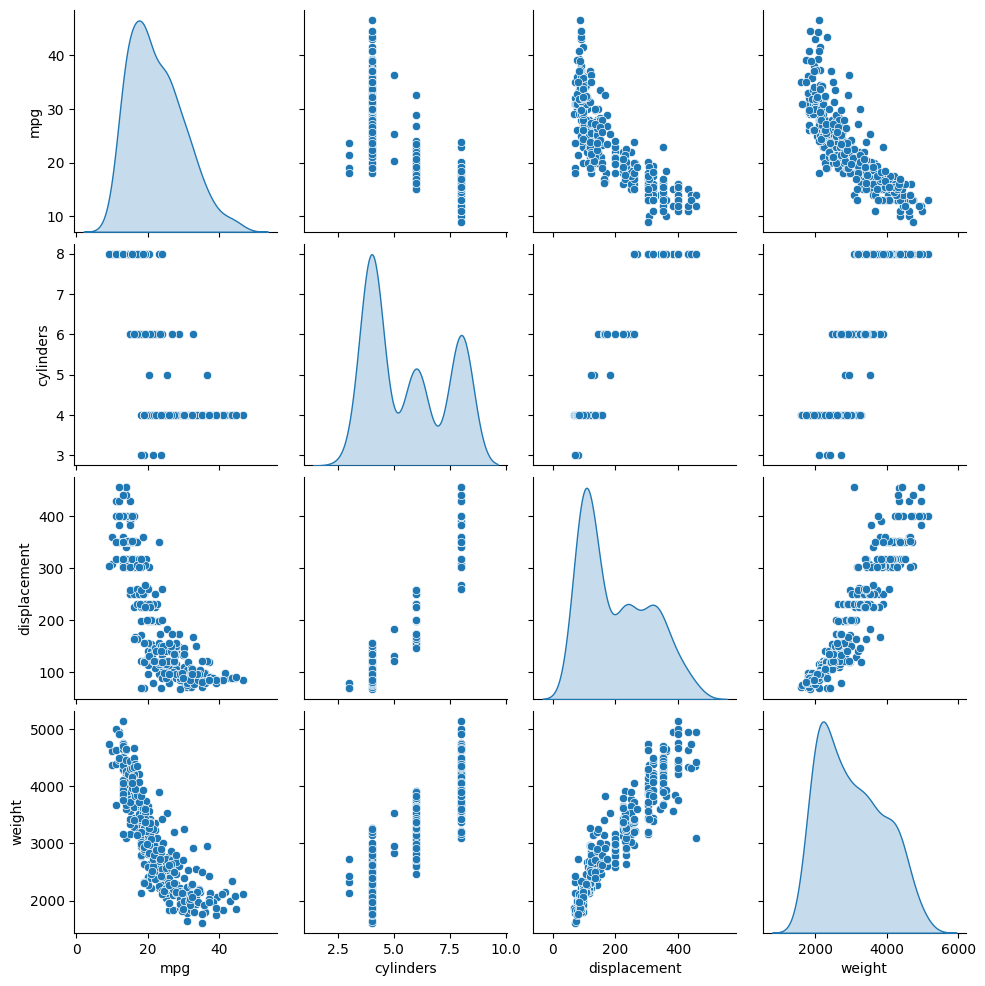

In [13]:
sns.pairplot(dataset[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

Let's also check the overall statistics. Note how each feature covers a very different range:

In [14]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,348.0,22.447414,7.520203,9.0,16.15,21.0,27.20,46.6
cylinders,348.0,5.600575,1.737433,3.0,4.00,6.0,8.00,8.0
displacement,348.0,201.846264,107.249004,68.0,103.25,159.5,302.00,455.0
horsepower,348.0,107.367816,39.552793,46.0,78.00,96.0,137.25,230.0
weight,348.0,3032.439655,872.839686,1613.0,2243.00,2904.5,3726.25,5140.0
acceleration,348.0,15.419540,2.779436,8.0,13.50,15.4,17.00,24.8
model year,348.0,75.204023,3.228348,70.0,73.00,75.0,78.00,81.0
origin,348.0,1.540230,0.778746,1.0,1.00,1.0,2.00,3.0


### Split features from labels

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [18]:
# Define the MLP regressor model using TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Separate features (X) and target (y)
X = dataset.drop(columns=['mpg','car name'], inplace=False)  # Drop 'MPG' column from features
y = dataset['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



def create_mlp_regressor(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer with 1 neuron for regression
    ])
    model.compile(optimizer='adam', loss='mse')  # Using mean squared error as loss for regression
    return model

# Create the sklearn pipeline
mlp_regressor = Pipeline([
    ('scaler', StandardScaler()),         # Standardize features
    ('mlp_regressor', MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1000))  # MLP regressor model
])

# Fit the pipeline to the training data
mlp_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp_regressor',
                 MLPRegressor(hidden_layer_sizes=(128, 64, 32),
                              max_iter=1000))])

In [19]:
# Evaluate the pipeline
train_score = mlp_regressor.score(X_train, y_train)
test_score = mlp_regressor.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.9432731124947612
Testing R^2 score: 0.8663196345588615


In [20]:
# Predict using the pipeline
y_pred = mlp_regressor.predict(X_test)

In [21]:
y_pred

array([25.82 , 26.17 , 24.018, 27.5  , 28.069, 13.003, 31.325, 16.425,
       19.466, 17.69 , 13.756, 17.724, 37.249, 25.712, 27.768, 13.259,
       28.2  , 23.89 , 23.873, 18.854, 17.008, 18.295, 16.764, 22.894,
       22.943, 10.13 , 13.202, 14.326, 13.405, 20.53 , 20.678, 13.622,
       26.377, 18.61 , 21.039, 27.513, 12.926, 22.804, 14.833, 26.286,
       26.497, 28.404, 28.309, 13.869, 18.715, 23.261, 25.499, 18.085,
       14.572, 35.512, 33.535, 16.983, 19.53 , 30.59 , 30.789, 21.143,
       21.223, 17.926, 14.751, 23.215, 14.23 , 20.779, 12.734, 34.48 ,
       20.409, 13.139, 20.439, 27.349, 30.204, 38.759])

In [22]:
from Notebook.DSNotebook.NotebookExecutor import NotebookExecutor
nb = NotebookExecutor()
saved_model = nb.save_model(model = mlp_regressor, modelName = 'Reg_TF', modelType = 'ml', X = None, y = None, estimator_type='')
#X and y are training datasets to get explainer dashboard.
#estimator_type is to specify algorithm type i.e., classification and regression.
#Only 'ml’ models with tabular data as input will support in Explainer Dashboard.
#Choose modelType = 'ml' for machine learning models, modelType = 'cv' for computer vision models and modelType = 'dp' for data transformation pickle files. 
#Provide ‘column_headers’ as a parameter if they have to be saved in the model.
#If using custom layer in keras, use native save functionality from keras.

WARN: Training data is not provided. Unable to generate Explainer Dashboard
